In [4]:
# Import matplotlib's pyplot to enable data visualization through plots and charts. 
# Pyplot is a collection of functions that make matplotlib work like MATLAB, making it easy to plot data and create figures.
import matplotlib.pyplot as plt

# Import the load_diabetes function from sklearn's datasets module. 
# This function loads and returns the diabetes dataset, which is a standard dataset used in machine learning for regression tasks.
from sklearn.datasets import load_diabetes

# Import the GaussianMixture model from sklearn's mixture module. 
# GaussianMixture is a type of unsupervised learning model that is used for clustering. 
# It models the data as a mixture of several Gaussian distributions, which can be useful for finding subgroups within the data.
from sklearn.mixture import GaussianMixture

In [5]:
# Load the diabetes dataset as a pandas DataFrame by setting `as_frame=True`. 
# The dataset contains ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements for 442 diabetes patients, along with a response of interest, 
# which is a quantitative measure of disease progression one year after baseline.
diab = load_diabetes(as_frame=True)

# Print the detailed description of the diabetes dataset, including information about the dataset size,
# variables, target variable, and the source. This is useful for understanding the context and the 
# structure of the data we're working with.
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

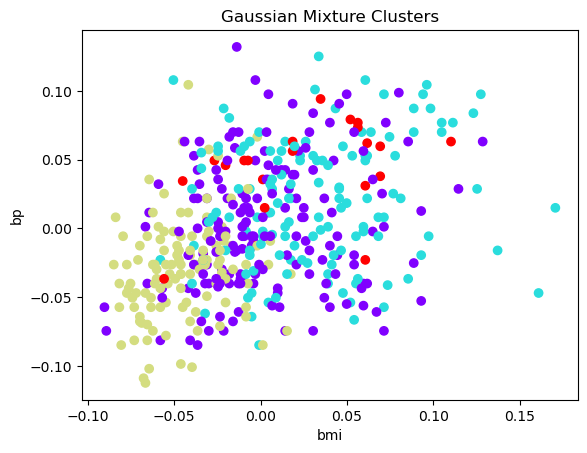

In [8]:
# Initialize a GaussianMixture model with 4 components/clusters. The initialization
# of parameters is set to 'random' to start the algorithm with random means, and
# 'covariance_type' is set to 'full', allowing each cluster to have its own general covariance matrix.
em_gaussian = GaussianMixture(n_components=4, init_params='random', covariance_type='full')

# Fit the Gaussian Mixture model to the diabetes dataset 'diab_df' and predict the cluster
# for each data point. The result is an array of cluster indices corresponding to each sample.
cluster_preds = em_gaussian.fit_predict(diab_df)

# Set the title of the scatter plot to 'Gaussian Mixture Clusters'.
plt.title('Gaussian Mixture Clusters')

# Label the x-axis of the plot as 'bmi' to indicate the Body Mass Index feature.
plt.xlabel('bmi')

# Label the y-axis of the plot as 'bp' to indicate the blood pressure feature.
plt.ylabel('bp')

# Create a scatter plot of the 'bmi' versus 'bp' from the diabetes dataset. The color of each
# point is determined by the cluster it belongs to, with different colors representing different clusters.
# The 'cmap' parameter set to 'rainbow' uses a spectrum of colors to distinguish the clusters.
plt.scatter(diab_df['bmi'], diab_df['bp'], c=cluster_preds, cmap='rainbow')

# Save the figure to a PNG file named 'simple_diabetes_clusters.png' with a resolution of 300 dots per inch (dpi).
plt.savefig('simple_diabetes_clusters.png', dpi=300)


In [9]:
# Calculate and print the Akaike Information Criterion (AIC) for the model. 
# The AIC is a measure of the relative quality of statistical models for a given set of data. 
# A lower AIC value indicates a better fit of the model to the data.
print(em_gaussian.aic(diab_df))

# Calculate and print the Bayesian Information Criterion (BIC) for the model.
# The BIC is similar to the AIC but includes a penalty term for the number of parameters in the model. 
# It helps to resolve the problem of overfitting by introducing a penalty term for the number of parameters in the model. 
# Like AIC, a lower BIC value suggests a better model fit to the data.
print(em_gaussian.bic(diab_df))


-14528.111740865492
-13255.714367539327


In [ ]:
# Output Explanation (you results may be slightly different):
# -14528.111740865492 (AIC Value): This value represents the Akaike Information Criterion (AIC) for the model. 
# AIC is a criterion for model selection, balancing the model's goodness of fit against its complexity (number of parameters). 
# A lower AIC value indicates a model that efficiently explains the data variance while maintaining simplicity. 
# It's particularly useful for comparing different models on the same dataset, with preference given to models with lower AIC values.

# -13255.714367539327 (BIC Value): This value represents the Bayesian Information Criterion (BIC) for the model. 
# Similar to AIC, BIC also assesses model quality, but it applies a stricter penalty for the number of parameters, 
# making it more robust against models overfitting on the dataset. A lower BIC value suggests a model that is a good 
# fit for the data but is not overly complex, aiming for the optimal balance between explanatory power and simplicity.
# When comparing models, those with lower BIC values are generally preferred as they indicate a better model selection 
# by penalizing complexity more heavily than AIC.